<a href="https://colab.research.google.com/github/kosirobwada/DeepLearningFromZero2/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第2章自然言語処理と単語の分散表現

# シソーラス
・類語辞書であり、同じ意味の単語や、意味の似た単語が同じグループに分類される。

・人の作業コストが高く、単語の細かなニュアンスを表現できない。

# コーパス

・大量のテキストデータ。

・自然言語処理の研究のために目的をもって収集されたデータ。

In [ ]:
text = 'You say goodbye and Isay hello.'

In [ ]:
text = text.lower()
print(text)

you say goodbye and isay hello.


In [ ]:
text = text.replace('.',' .')
print(text)

you say goodbye and isay hello  .


In [ ]:
words = text.split(' ')
print(words)

['you', 'say', 'goodbye', 'and', 'isay', 'hello', '', '.']


In [ ]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
print(id_to_word)
print(word_to_id)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'isay', 5: 'hello', 6: '', 7: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'isay': 4, 'hello': 5, '': 6, '.': 7}


In [ ]:
print(id_to_word[1])
print(word_to_id['hello'])

say
5


In [ ]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)

[0 1 2 3 4 5 6 7]


In [ ]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.',' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [ ]:
text = 'I am hungry and I want to eat chocolate'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 0 4 5 6 7]
{'i': 0, 'am': 1, 'hungry': 2, 'and': 3, 'want': 4, 'to': 5, 'eat': 6, 'chocolate': 7}
{0: 'i', 1: 'am', 2: 'hungry', 3: 'and', 4: 'want', 5: 'to', 6: 'eat', 7: 'chocolate'}


# 分布仮説

・単語の意味は、周囲の単語によって形成されるという仮説。

# コンテクスト

・ある中央の単語に対して、その周辺にある単語。

# カウントベースの手法

・分布仮説に基づいて、単語をベクトルで表す方法。

・ある単語に着目した場合、その周辺にどのような単語が現れるかをカウントし、集計したもの。

In [ ]:
text = 'My birthday is October third. Please give me a present.'

corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)
print(word_to_id)

[ 0  1  2  3  4  5  6  7  8  9 10  5]
{0: 'my', 1: 'birthday', 2: 'is', 3: 'october', 4: 'third', 5: '.', 6: 'please', 7: 'give', 8: 'me', 9: 'a', 10: 'present'}
{'my': 0, 'birthday': 1, 'is': 2, 'october': 3, 'third': 4, '.': 5, 'please': 6, 'give': 7, 'me': 8, 'a': 9, 'present': 10}


In [ ]:
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0],
],dtype=np.int32)

In [ ]:
print(C[0])
print(C[4])

print(C[word_to_id['my']])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 0 0 0 0]


In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size),dtype=np.int32)

  for idx, word_id, in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1
  return co_matrix

# ベクトルの類似度

・ベクトルの内積、ユークリッド距離、cos類似度

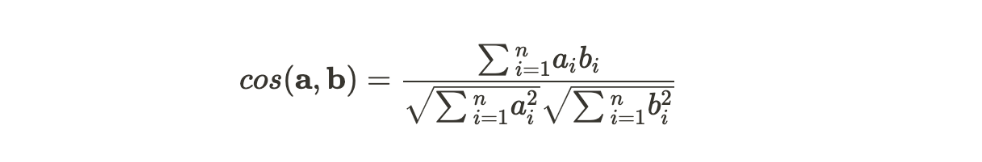

In [ ]:
# epsは0除算が発生しないために足している。
def cos_similarity(x,y,eps=1e-8):
  nx = x / np.sqrt(np.sum(x**2)+eps)
  ny = y / np.sqrt(np.sum(y**2)+eps)

  return np.dot(nx,ny)

In [ ]:
text = 'Sit down please. It is a dinner time now.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['it']]
c1 = C[word_to_id['please']]

#単語の類似度を計算
print(cos_similarity(c0,c1))

0.49999999749999996


# 単語の類似度ランキングの作成

|引数名|説明|
|----|----|
|query|クエリ（単語）|
|word_to_id|単語から単語IDへの辞書|
|id_to_word|単語IDから単語への辞書|
|word_matrix|単語ベクトルをまとめた行列。各行に対する単語のベクトルが格納されている|
|top|上位何位まで表示するか|

In [ ]:
def most_similarity(query, word_to_id, id_to_word, word_matrix, top=5):
  if query not in word_to_id:
    print('%s is not found' % query)
    return

  print('\n{query}' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)

  count = 0
  for i in (-1*similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(' %s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

In [ ]:
text = 'I am from Japan. You are from India. She is from Kyoto. He love soccer.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similarity('you', word_to_id, id_to_word, C, top=5)


{query}you
 japan: 0.49999999749999996
 india: 0.49999999749999996
 she: 0.49999999749999996
 kyoto: 0.49999999749999996
 he: 0.49999999749999996


# PMI

相互情報量（Pointwise Mutual Information）

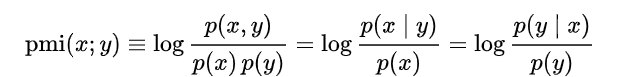

In [ ]:
def ppmi(C, verbose=False, eps=1e-8):
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C,axis=0)

  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i,j] * N/(S[j]*S[i])+eps)
      M[i,j] = max(0,pmi)

      if verbose:
        cnt += 1
        if cnt % (total//100) == 0:
          print('%.1f%% done' % (100*cnt/total))
  return M

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


# 次元削減

・重要な情報を残したまま削減。

# 特異値分解（Singular Value Decomposition）

・任意の行列を3つの行列の積へと分解。



In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

U, S, V = np.linalg.svd(W)

print(C[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


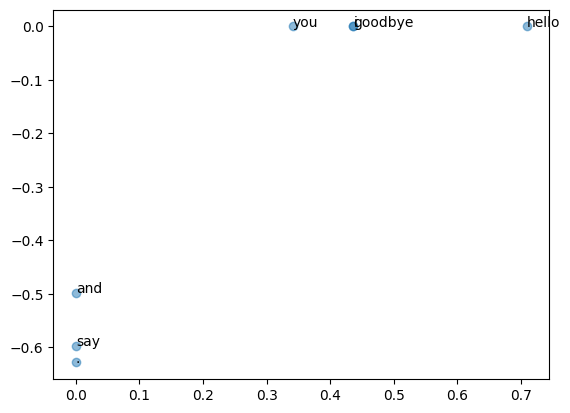

In [ ]:
import matplotlib.pyplot as plt
for word, word_id, in word_to_id.items():
  plt.annotate(word, (U[word_id, 0],U[word_id, 1]))

plt.scatter(U[:,0],U[:,1],alpha=0.5)
plt.show()

# カウントベースの手法まとめ

・周囲の単語の頻度によって単語を表現。

・単語の共起行列を作り、その行列に対してSVDを実行。

・密なベクトル（単語の分散表現）を獲得。